In [1]:
import time
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

## Load encodings csv

In [2]:
filepath = './data/encodings.csv'
df = pd.read_csv(filepath, header=0)
print(df.shape)
df.head()

(99, 769)


,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat759,feat760,feat761,feat762,feat763,feat764,feat765,feat766,feat767,text
0,0.820258,-0.405376,0.380930,0.183264,0.064426,0.296213,0.926369,-0.202282,-0.078958,-0.358146,...,-0.049089,-0.114145,-0.311827,0.279992,-0.082602,0.367847,-0.202135,0.302579,0.263909,more
1,0.947154,-0.434965,0.202510,-0.430143,0.130879,0.393260,0.871038,0.174279,-0.334923,-0.477715,...,0.217229,-0.215446,-0.210280,0.354309,-0.241601,0.762208,0.064532,0.014639,0.179925,see
2,-0.100747,-0.214949,-0.157143,-0.437144,0.365118,0.030364,0.624652,-0.340723,0.050147,-1.009346,...,0.362320,-0.449942,-0.001656,0.033199,0.162571,0.608851,-0.124599,0.258131,0.215272,cycle
3,0.426986,-0.355948,-0.066649,-0.401748,0.070290,0.237317,0.468678,0.021793,-0.114481,-0.228925,...,0.240629,-0.009698,-0.023549,-0.141876,-0.080970,0.637621,0.185829,0.545685,-0.565550,appears
4,0.605578,-0.544845,0.342311,-0.691082,0.023688,0.199598,0.648942,-0.152661,-0.359639,-0.766074,...,0.206783,-0.101216,-0.042941,0.017916,0.273118,0.345516,-0.052251,0.423928,-0.104784,identifies


# PCA

In [3]:
data = df.loc[:, df.columns != 'text'].values

pca = PCA(n_components=3, random_state = 42)
pca_result = pca.fit_transform(data)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09975833 0.08260565 0.0539177 ]


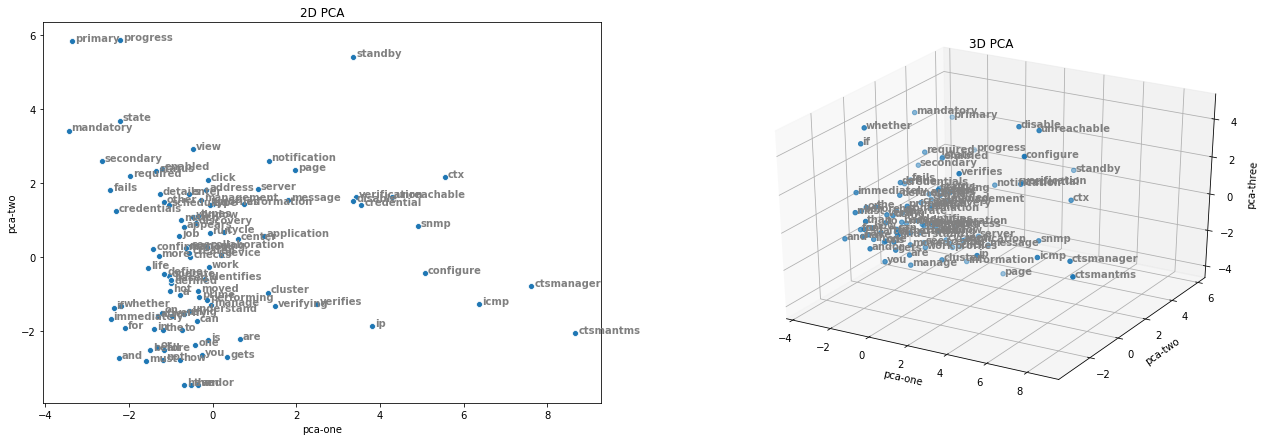

In [4]:
fig = plt.figure(figsize=(22,7))

# PCA in 2D
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(
    x = df['pca-one'], 
    y = df['pca-two'])
ax1.set_title("2D PCA")

# PCA in 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"],
    cmap='tab10')
ax2.set_title("3D PCA")
ax2.set_xlabel('pca-one')
ax2.set_ylabel('pca-two')
ax2.set_zlabel('pca-three')

# Annotate points with labels
for line in df.index:
    ax1.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax2.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"pca-three"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')

fig.show()

# t-SNE

In [36]:
data = df.loc[:, df.columns != 'text'].values
tsne = TSNE(n_components=3, perplexity=15, n_iter=1500, learning_rate = 1000, random_state = 42, verbose=1)
tsne_results = tsne.fit_transform(data)

df['tsne-one'] = tsne_results[:,0]
df['tsne-two'] = tsne_results[:,1]
df['tsne-three'] = tsne_results[:,2]

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 99 samples in 0.002s...
[t-SNE] Computed neighbors for 99 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 99 / 99
[t-SNE] Mean sigma: 476.134336
[t-SNE] KL divergence after 250 iterations with early exaggeration: 106.489487
[t-SNE] KL divergence after 1500 iterations: 3.150457


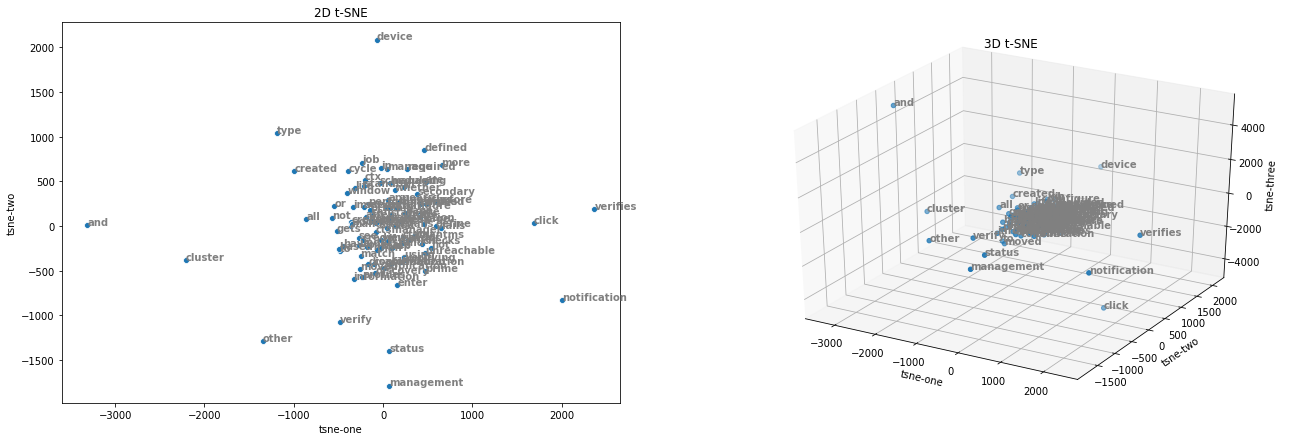

In [37]:
fig = plt.figure(figsize=(22,7))

# t-SNE in 2D
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(
    x = df['tsne-one'], 
    y = df['tsne-two'])
ax1.set_title("2D t-SNE")

# t-SNE in 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(
    xs=df["tsne-one"], 
    ys=df["tsne-two"], 
    zs=df["tsne-three"],
    cmap='tab10')
ax2.set_title("3D t-SNE")
ax2.set_xlabel('tsne-one')
ax2.set_ylabel('tsne-two')
ax2.set_zlabel('tsne-three')

# Annotate points with labels
for line in df.index:
    ax1.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax2.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"tsne-three"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')

fig.show()

# Comparisons between PCA and t-SNE

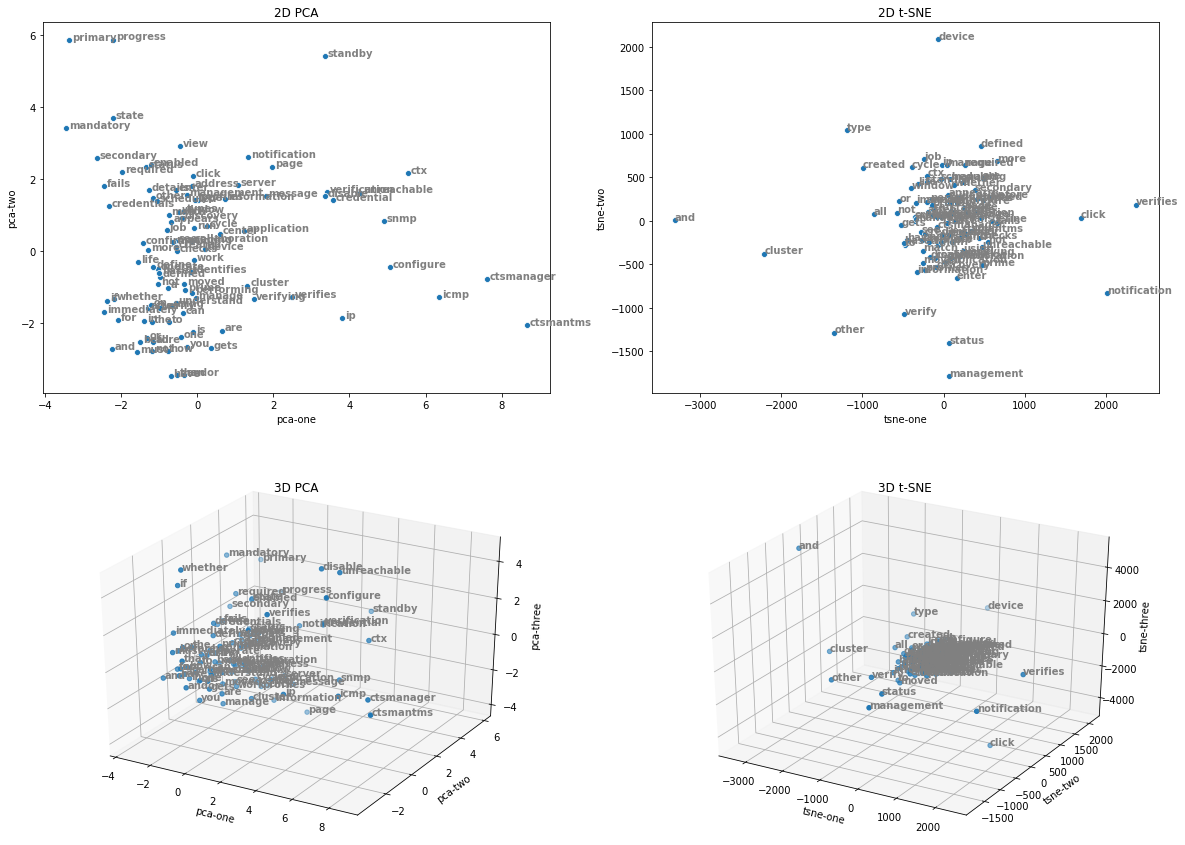

In [38]:
fig = plt.figure(figsize=(20,15))

# PCA in 2D
ax1 = fig.add_subplot(2, 2, 1)
sns.scatterplot(
    x = df['pca-one'], 
    y = df['pca-two'])
ax1.set_title("2D PCA")

# t-SNE in 2D
ax2 = fig.add_subplot(2, 2, 2)
sns.scatterplot(
    x = df['tsne-one'], 
    y = df['tsne-two'])
ax2.set_title("2D t-SNE")


# PCA in 3D
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"],
    cmap='tab10')
ax3.set_title("3D PCA")
ax3.set_xlabel('pca-one')
ax3.set_ylabel('pca-two')
ax3.set_zlabel('pca-three')

# t-SNE in 3D
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(
    xs=df["tsne-one"], 
    ys=df["tsne-two"], 
    zs=df["tsne-three"],
    cmap='tab10')
ax4.set_title("3D t-SNE")
ax4.set_xlabel('tsne-one')
ax4.set_ylabel('tsne-two')
ax4.set_zlabel('tsne-three')

# Annotate points with labels
for line in df.index:
    ax1.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax2.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax3.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"pca-three"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax4.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"tsne-three"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')

fig.show()

# Combining PCA and t-SNE

In [39]:
data = df.loc[:, df.columns != 'text'].values

# Use PCA to reduce dimensions to a number that's manageable for t-SNE
pca_50 = PCA(n_components=50, random_state = 6)
pca_result_50 = pca_50.fit_transform(data)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))


# Reduce dimensionality to 2 with t-SNE.
# Perplexity is roughly the number of close neighbors you expect a point to have. Our data is sparse, so we chose a small value, 10.
# The KL divergence objective is non-convex, so the result is different depending on the seed used.
tsne = TSNE(n_components=2, perplexity=10, n_iter=1500, learning_rate = 1000, random_state = 7, verbose=1)
tsne_pca_results = tsne.fit_transform(pca_result_50)

# Add results to dataframe
df['tsne-pca50-one'] = tsne_pca_results[:,0]
df['tsne-pca50-two'] = tsne_pca_results[:,1]

Cumulative explained variation for 50 principal components: 0.9999988175585335
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 99 samples in 0.000s...
[t-SNE] Computed neighbors for 99 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 99 / 99
[t-SNE] Mean sigma: 443.308266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 110.872673
[t-SNE] KL divergence after 1500 iterations: 1.562655


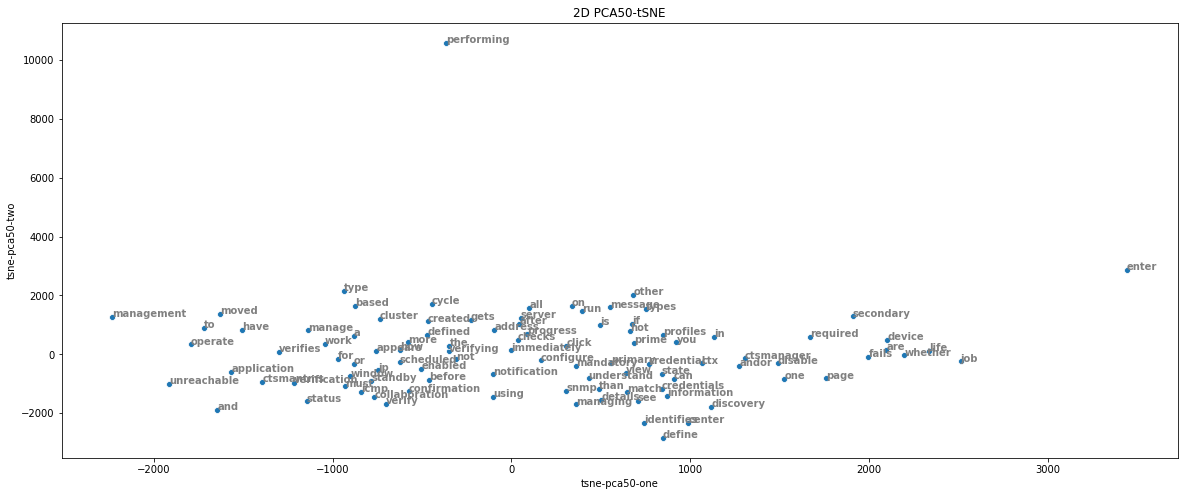

In [47]:
fig = plt.figure(figsize=(20,8))
ax1 = sns.scatterplot(
    x = df['tsne-pca50-one'], 
    y = df['tsne-pca50-two'])
ax1.set_title("2D PCA50-tSNE")

# Annotate points with labels
for line in df.index:
    ax1.text(df.loc[line,"tsne-pca50-one"]+0.07, 
             df.loc[line,"tsne-pca50-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray',
             weight='semibold')

# Compare the three methods

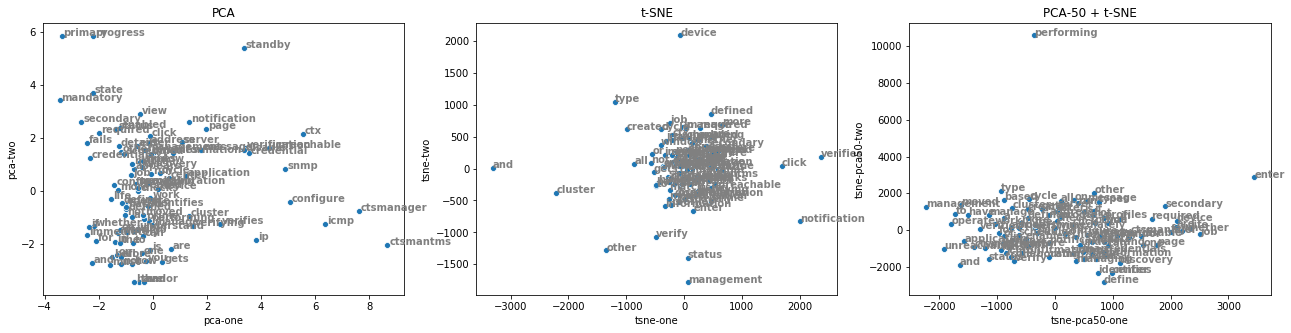

In [48]:
fig = plt.figure(figsize=(22,5))

# PCA in 2D
ax1 = fig.add_subplot(1, 3, 1)
sns.scatterplot(
    x = df['pca-one'], 
    y = df['pca-two'])
ax1.set_title("PCA")

# t-SNE in 2D
ax2 = fig.add_subplot(1, 3, 2)
sns.scatterplot(
    x = df['tsne-one'], 
    y = df['tsne-two'])
ax2.set_title("t-SNE")

# PCA-50 + t-SNE in 2D
ax3 = fig.add_subplot(1, 3, 3)
ax3 = sns.scatterplot(
    x = df['tsne-pca50-one'], 
    y = df['tsne-pca50-two'])
ax3.set_title("PCA-50 + t-SNE")


# Annotate points with labels
for line in df.index:
    ax1.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax2.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax3.text(df.loc[line,"tsne-pca50-one"]+0.07, 
             df.loc[line,"tsne-pca50-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')

fig.show()